In [86]:
import os
from datetime import datetime
import sounddevice as sd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

# Load the model
model = tf.keras.models.load_model('Spectrogram_model_1.keras')

# Settings for recording
duration = 3  # Record for 2 seconds
sample_rate = 16000  # Sample rate
channels = 1  # Mono recording

# Record audio from microphone
print("Recording...")
audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='int16')
sd.wait()  # Wait for the recording to finish
print("Recording stopped.")

# Generate a unique filename using current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_path = f"recording/recorded_audio_{timestamp}.wav"

# Save the recorded audio to a file
sf.write(file_path, audio_data, sample_rate)
print(f"Audio saved as {file_path}")



Recording...
Recording stopped.
Audio saved as recording/recorded_audio_20240314_150822.wav


(1, 124, 128, 1, 1)
1/1 [==============================] - 0s 105ms/step


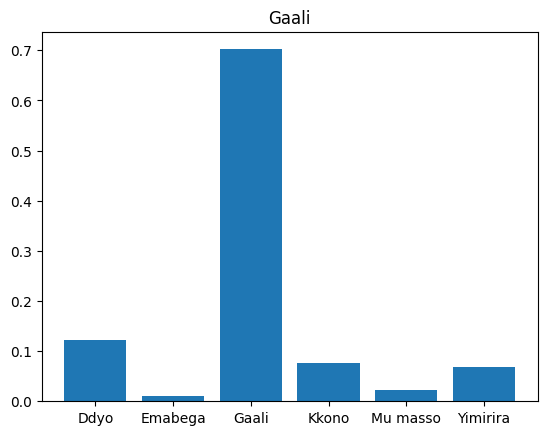

In [85]:
def get_label_names():
    return ['Ddyo', 'Emabega', 'Gaali', 'Kkono',   'Mu masso', 'Yimirira']

def get_mel_spectrogram(waveform, sample_rate=16000, n_mels=128):
    # Compute the Short-Time Fourier Transform (STFT)
    stft = tf.signal.stft(waveform, frame_length=255, frame_step=128)

    # Convert the magnitude of the STFT to a Mel spectrogram
    spectrogram = tf.abs(stft)
    mel_spectrogram = tf.signal.linear_to_mel_weight_matrix(
        num_mel_bins=n_mels,
        num_spectrogram_bins=spectrogram.shape[-1],
        sample_rate=sample_rate
    )
    mel_spectrogram = tf.tensordot(spectrogram, mel_spectrogram, 1)
    mel_spectrogram = tf.math.log(mel_spectrogram + 1e-6)  # Log-scale

    # Add an axis for the batch size
    mel_spectrogram = mel_spectrogram[..., tf.newaxis]

    return mel_spectrogram



# Load the audio file and preprocess for inference
x = file_path
x = tf.io.read_file(str(x))
x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
x = tf.squeeze(x, axis=-1)
waveform = x
x = get_mel_spectrogram(x)
# x = x.T  # Transpose to match the expected shape (124, 128)
x = x[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions
print(x.shape)

# Perform inference
prediction = model.predict(x)

# Get the labels
label_names_slice = get_label_names()

# Get the predicted label
predicted_label_index = np.argmax(prediction[0])
predicted_label = label_names_slice[predicted_label_index]

# Display the prediction
plt.bar(label_names_slice, tf.nn.softmax(prediction[0]))
plt.title(predicted_label)
plt.show()

# Play the recorded audio
Audio(waveform, rate=16000)


Recording...
Recording stopped.
Audio saved as recording/recorded_audio_20240314_103209.wav
(1, 124, 128, 1, 1)
1/1 [==============================] - 0s 79ms/step
Please say the wake word 'Gaali'.


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (6,).

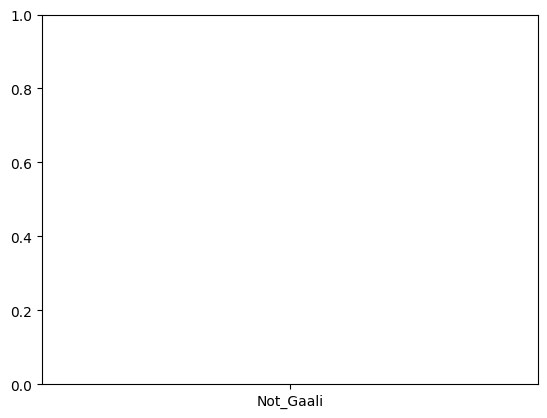

In [75]:
import os
from datetime import datetime
import sounddevice as sd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

# Load the model
model = tf.keras.models.load_model('Spectrogram_model_1.keras')

# Settings for recording
duration = 2  # Record for 2 seconds
sample_rate = 16000  # Sample rate
channels = 1  # Mono recording

# Record audio from microphone
print("Recording...")
audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='int16')
sd.wait()  # Wait for the recording to finish
print("Recording stopped.")

# Generate a unique filename using current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_path = f"recording/recorded_audio_{timestamp}.wav"

# Save the recorded audio to a file
sf.write(file_path, audio_data, sample_rate)
print(f"Audio saved as {file_path}")

def get_label_names():
    return ['Not_Gaali', 'Ddyo', 'Emabega', 'Gaali', 'Kkono', 'Mu masso', 'Yimirira']

def get_mel_spectrogram(waveform, sample_rate=16000, n_mels=128):
    # Compute the Short-Time Fourier Transform (STFT)
    stft = tf.signal.stft(waveform, frame_length=255, frame_step=128)

    # Convert the magnitude of the STFT to a Mel spectrogram
    spectrogram = tf.abs(stft)
    mel_spectrogram = tf.signal.linear_to_mel_weight_matrix(
        num_mel_bins=n_mels,
        num_spectrogram_bins=spectrogram.shape[-1],
        sample_rate=sample_rate
    )
    mel_spectrogram = tf.tensordot(spectrogram, mel_spectrogram, 1)
    mel_spectrogram = tf.math.log(mel_spectrogram + 1e-6)  # Log-scale

    # Add an axis for the batch size
    mel_spectrogram = mel_spectrogram[..., tf.newaxis]

    return mel_spectrogram

# Load the audio file and preprocess for inference
x = file_path
x = tf.io.read_file(str(x))
x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
x = tf.squeeze(x, axis=-1)
waveform = x
x = get_mel_spectrogram(x)
# x = x.T  # Transpose to match the expected shape (124, 128)
x = x[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions
print(x.shape)

# Perform inference
prediction = model.predict(x)

# Get the labels
label_names_slice = get_label_names()

# Get the predicted label
predicted_label_index = np.argmax(prediction[0])
predicted_label = label_names_slice[predicted_label_index]

# Check if the predicted label is "Gaali" (wake word)
if predicted_label == 'Gaali':
    print("Wake word detected! Please say a command.")
    # Your code to handle the motor command

else:
    print("Please say the wake word 'Gaali'.")
    # Your code to prompt the user to say the correct wake word

# Display the prediction
plt.bar(label_names_slice, tf.nn.softmax(prediction[0]))
plt.title(predicted_label)
plt.show()

# Play the recorded audio
Audio(waveform, rate=16000)
